In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
from numpy.linalg import inv


# a)

\begin{equation}
i\hbar \partial_t\psi(x,t)=\left(-\frac{\hbar^2}{2m} \vec{\nabla}^2+\frac{1}{2}m\omega^2x^2 \right)\psi(x,t)=\hat{H}\psi(x,t) \tag{1}
\end{equation}

take out $\frac{\omega \hbar}{2}$ from right hand side:

\begin{equation}
i\hbar \partial_t\psi(x,t)=\frac{\omega \hbar}{2}\left(-\frac{\hbar}{m\omega} \vec{\nabla}^2+\frac{m\omega}{\hbar}x^2 \right)\psi(x,t)=\hat{H}\psi(x,t)  \tag{2}
\end{equation}

We devide above equation by $\hbar$. Then, introducing  $\alpha^2=\frac{m \omega}{\hbar}$, we get

\begin{equation}
i\partial_t\psi(x,t)=\frac{\omega}{2}\left(-\frac{1}{\alpha^2} \frac{\partial^2}{\partial x^2} +\alpha^2x^2 \right)\psi(x,t)=\frac{1}{\hbar}\hat{H}\psi(x,t)  \tag{3}
\end{equation}

Multipling  with   $2/\omega$ and introducing new variables $\xi=\alpha x$, $\tau=\frac{\omega t}{2}$ we get:

\begin{equation}
i\partial_\tau\psi=\left(- \frac{\partial^2}{\partial \xi^2} +\xi^2 \right)\psi=\frac{2}{\hbar\omega} \hat{H}\psi=\hat{\tilde{H}}\psi   \tag{4}
\end{equation}
where $\hat{\tilde{H}}=\frac{2}{\hbar\omega} \hat{H}$. Hence $\beta=\frac{2}{\hbar\omega}$.



# b)

In [2]:
ksi_l=-10
ksi_r=10
dksi=0.1    # correspond to delta x
dtau=0.005   #correspond to delta t
xi = np.arange(ksi_l, ksi_r + dksi, dksi)  # range is from -10 to 10 with 0.1 step. 10 is alos included
Nx = len(xi)    #number of steps
Nt=201   #number of time steps
print(Nx)
I = np.eye(Nt,dtype=complex)


201


In [3]:
H=np.zeros((Nt,Nx),dtype=complex)

In [4]:
def Hamilton(N_time,N_xi):

    for n in range(N_time):
        for m in range(N_xi):
            if m==n-1:
                H[n,n-1]=-1/dksi**2
            if m==n+1:
                H[n,n+1]=-1/dksi**2
            H[n,m]=2/dksi**2+dksi**2*n**2
    return H


In [5]:
Mat_min=I-1j*Hamilton(Nt,Nx)*dtau/2
Mat_plus=I+1j*Hamilton(Nt,Nx)*dtau/2

S_H=np.linalg.inv(Mat_min)@Mat_plus   # @ is the same as np.dot()
print(S_H[0][0],S_H[-1][-1])
print("Size of the matrix",S_H.shape)

(0.9940360270787868+3.557023822946105e-05j) (0.9821080812364633+0.00010671071473848456j)
Size of the matrix (201, 201)


In [6]:
def wave_func(N_t,psi_0):
    psi_new=np.copy(psi_0)
    for n in range(N_t):
        #psi_new=np.dot(S_H,psi_new)
        psi_new=S_H@psi_new
        norm_each=np.sum(np.abs(psi_new)**2)*dksi
        print("Check if psi is normalized in each step=",norm_each)
    return psi_new


# c)

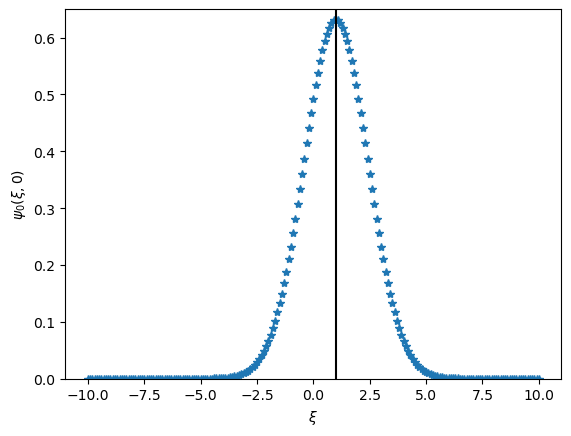

In [7]:
psi0=(1/2/np.pi)**0.25*np.exp(-(xi-1)**2/4)
plt.plot(xi,psi0,'*')
plt.axvline(x = 1, color = 'black', label = 'axvline - full height')
plt.ylabel(r'$\psi_0 (\xi,0)$')
plt.xlabel(r'$\xi$')
plt.ylim(0,0.65)
plt.show()


Discretization is done from -10 to 10 with 0.1 steps with 201 steps
$\xi_j=j\Delta \xi$


In [8]:

norm=np.sum(np.abs(psi0)**2)*dksi
print("Norm of wave function=",norm)


Norm of wave function= 1.0000000000000033


# d)

In [9]:
#psi[0]=psi0
tau=10
psi_new=wave_func(tau,psi0)
norm_last=np.sum(np.abs(psi_new)**2)*dksi
print("Last result also=",norm_last)




Check if psi is normalized in each step= 1.1606877561151678
Check if psi is normalized in each step= 1.0000228628071102
Check if psi is normalized in each step= 1.160642033754007
Check if psi is normalized in each step= 1.0000914382170583
Check if psi is normalized in each step= 1.1605506150524005
Check if psi is normalized in each step= 1.000205687203338
Check if psi is normalized in each step= 1.1604135520370567
Check if psi is normalized in each step= 1.0003655447464423
Check if psi is normalized in each step= 1.1602309227110277
Check if psi is normalized in each step= 1.0005709198708748
Last result also= 1.0005709198708748
